<a href="https://colab.research.google.com/github/ngTienPhat/CoderschoolProblemSet/blob/master/NguyenTienPhat_DAwP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Read `Salaries.csv` as a dataframe called `sal`.**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv(link)

**Check the head of the DataFrame.**

In [0]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [0]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [0]:
sal['BasePay'].mean()

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [0]:
(sal['BasePay'].min(), sal['BasePay'].max())

(-166.01, 319275.01)

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [0]:
print("average, min, max (OvertiemPay)")
col = sal['OvertimePay']
(col.mean(), col.min(), col.max())


average, min, max (OvertiemPay)


(5066.059886444622, -0.01, 245131.88)

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [15]:
sal['EmployeeName'] = sal['EmployeeName'].str.upper();
sal[sal['EmployeeName'] == 'joseph driscoll']['JobTitle']

Series([], Name: JobTitle, dtype: object)

In [0]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here
sal[sal['EmployeeName'] == 'gary jimenez']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,Employeename
1,2,gary jimenez,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,gary jimenez


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [0]:
sal[sal['EmployeeName'] == 'joseph driscoll']['TotalPayBenefits'].sum()

602159.7

**What is the name of highest paid person (including benefits)?**

In [0]:
years = sal['Year'].unique();

array([2011, 2012, 2013, 2014])

In [0]:
name_pay_sal = sal[['EmployeeName', 'Year', 'TotalPayBenefits']]
years = sal['Year'].unique();
for y in years:
    print(y)
    sal_y = name_pay_sal[name_pay_sal['Year'] == y].sort_values(['TotalPayBenefits'], ascending = False).iloc[0]
    print(sal_y)


2011
EmployeeName        nathaniel ford
Year                          2011
TotalPayBenefits            567595
Name: 0, dtype: object
2012
EmployeeName        gary altenberg
Year                          2012
TotalPayBenefits            407275
Name: 36159, dtype: object
2013
EmployeeName        gregory p suhr
Year                          2013
TotalPayBenefits            425815
Name: 72925, dtype: object
2014
EmployeeName        david shinn
Year                       2014
TotalPayBenefits         510733
Name: 110531, dtype: object


In [0]:
name_pay_sal = sal[['EmployeeName', 'Year', 'TotalPayBenefits']]
years = sal['Year'].unique();
for y in years:
  res = 'max paid person of year ' + str(y) + ' is: '
  sal_y = name_pay_sal[name_pay_sal['Year'] == y].sort_values(['TotalPayBenefits'], ascending = False).iloc[0]
  res += sal_y['EmployeeName'] + ' : ' + str(sal_y['TotalPayBenefits'])
  print(res)

max paid person of year 2011 is: nathaniel ford : 567595.43
max paid person of year 2012 is: gary altenberg : 407274.78
max paid person of year 2013 is: gregory p suhr : 425815.28
max paid person of year 2014 is: david shinn : 510732.68


**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [0]:
for y in years:
  res = 'max paid person of year ' + str(y) + ' is: '
  sal_y = name_pay_sal[name_pay_sal['Year'] == y].sort_values(['TotalPayBenefits'], ascending = True).iloc[0]
  res += sal_y['EmployeeName'] + ' : ' + str(sal_y['TotalPayBenefits'])
  print(res)

max paid person of year 2011 is: josephine mccreary : 0.0
max paid person of year 2012 is: donald clark : 1.91
max paid person of year 2013 is: david p kucia : -33.89
max paid person of year 2014 is: joe lopez : -618.13


--> the results are negative float. 

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [0]:
sal[['BasePay', 'Year']].groupby(['Year']).mean()

,BasePay
Year,
2011,63595.956517
2012,65436.406857
2013,69630.030216
2014,66564.421924


**How many unique job titles are there?**

Keyword: _unique, nunique_

In [0]:
sal['JobTitle'] = sal['JobTitle'].str.lower();
sal['JobTitle'].nunique()

1637

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [0]:
tmp_sal = sal.groupby(['JobTitle']).size()
tmp_sal.sort_values(ascending = False).iloc[:5]


JobTitle
transit operator    9424
special nurse       5791
registered nurse    4955
custodian           3214
firefighter         3153
dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**



In [0]:
sal2 = sal[sal['Year']==2013][['JobTitle', 'EmployeeName']]
n_emp_perJob = sal2.groupby(['JobTitle'])['EmployeeName'].nunique();
for job, empCount in n_emp_perJob.iteritems():
  if(empCount == 1):
    print(job)


acupuncturist
adm, sfgh medical center
administrative analyst i
administrative analyst ii
administrator, dph
airport communications officer
airport mechanical maint sprv
animal care asst supv
animal care supervisor
animal control supervisor
arborist technician supv ii
area sprv parks, squares & fac
asphalt plant supervisor 1
assessor
assistant director, probate
assistant industrial hygienist
assistant inspector
assistant inspector 2
assistant law librarian
assistant power house operator
assistant sheriff
assoc musm cnsrvt, aam
asst chf, bur clm invest&admin
asst dir of clinical svcs 1
asst dir, log cabin rnch
asst director, juvenile hall
asst superintendent rec
attorney, tax collector
auto body & fender wrk sprv 1
baker
bd/comm secretary 3
board scty, mta
braillist
captain, (fire department)
cement finisher supervisor 2
cfdntal sctry to city atty
chf district atty investigator
chf victim/witness invstgtor
chief adult probation officer
chief dep adlt prob of (sfers)
chief deputy adlt pr

**How many people have the word Chief in their job title?**

In [0]:
jobTitles = sal['JobTitle'].values
count = 0
comp_str = 'chief'
for title in jobTitles:
  if(comp_str in title):
    count += 1
print(count)

627


## Data Visualization

**Implement seaborn's countplot with x='Year'**

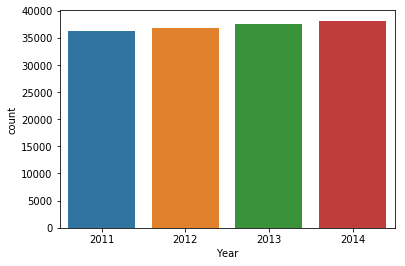

In [0]:
import seaborn as sns
sns.countplot(x='Year', data = sal)

**Implement seaborn's distplot for BasePay of Year 2011**

In [0]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)


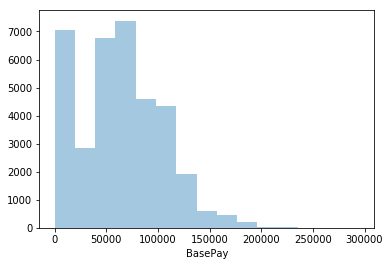

In [0]:
sns.distplot(sal[sal['Year']==2011]['BasePay'], bins=15, kde=False)

**How about other Year**

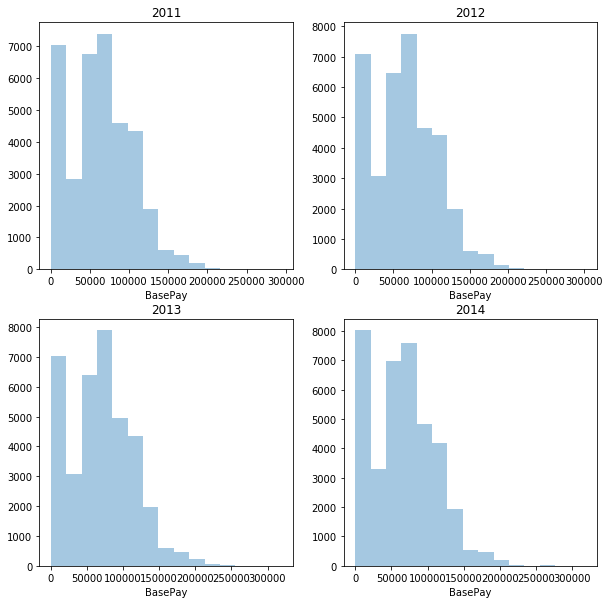

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

ax_2011 = fig.add_subplot(221)
ax_2012 = fig.add_subplot(222)
ax_2013 = fig.add_subplot(223)
ax_2014 = fig.add_subplot(224)

ax_2011.set_title('2011')
ax_2012.set_title('2012')
ax_2013.set_title('2013')
ax_2014.set_title('2014')

sns.distplot(sal[sal['Year']==2011]['BasePay'], bins=15, kde=False, ax=ax_2011)
sns.distplot(sal[sal['Year']==2012]['BasePay'], bins=15, kde=False, ax=ax_2012)
sns.distplot(sal[sal['Year']==2013]['BasePay'], bins=15, kde=False, ax=ax_2013)
sns.distplot(sal[sal['Year']==2014]['BasePay'], bins=15, kde=False, ax=ax_2014)

plt.show()

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

In [0]:

emp_per_job = sal.groupby(['JobTitle'])['Id'].nunique();
emp_per_job = emp_per_job.sort_values(ascending=False).iloc[:5];
idx = list(emp_per_job.keys())
chosen_data = sal['JobTitle'].isin(idx)
res = sal[chosen_data][['JobTitle', 'BasePay', 'Benefits', 'OvertimePay']].groupby('JobTitle').mean()

In [26]:
res

,BasePay,Benefits,OvertimePay
JobTitle,,,
Police Officer 3,108508.662621,32829.713693,16418.062615
Public Svc Aide-Public Works,8091.876070,1379.748050,60.017744
Registered Nurse,102650.396486,35950.834170,4204.840575
Special Nurse,29929.166718,3210.342240,651.723372
Transit Operator,51772.154465,27355.597533,11143.260866


**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [9]:
sal2 = sal 
sal2['jobTitle_len'] = sal2['JobTitle'].str.len()
sal2[['TotalPayBenefits', 'jobTitle_len']].corr()

,TotalPayBenefits,jobTitle_len
TotalPayBenefits,1.000000,-0.036878
jobTitle_len,-0.036878,1.000000


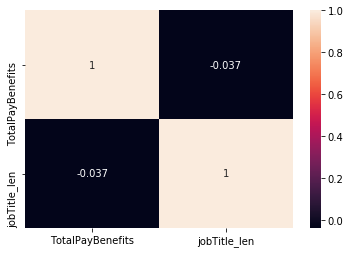

In [10]:
sns.heatmap(sal2[['TotalPayBenefits', 'jobTitle_len']].corr(), annot=True)

# Great Job!